### PCA

计算不同特征的重要性，达到降维的目的

In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)
%matplotlib inline

In [2]:
mu_vecl = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vecl, cov_mat1, 20).T

In [3]:
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

Populating the interactive namespace from numpy and matplotlib


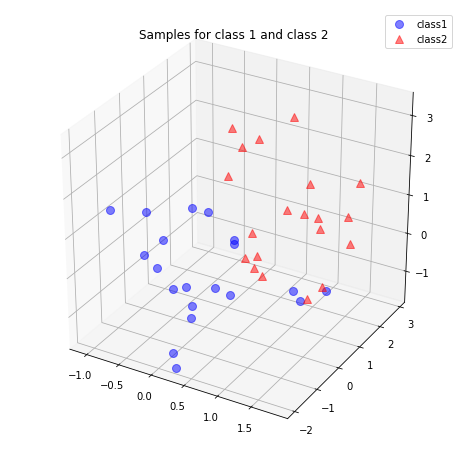

In [21]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [4]:
# 1. 连接两种类别数据
all_samples = np.concatenate((class1_sample, class2_sample),axis=1)

In [5]:
# 计算每个维度的均值
mean_vertor = np.mean(all_samples, axis = 1).reshape(-1, 1)

In [6]:
# 计算scatter矩阵
scatter_matrix = np.zeros((3, 3))
m, n = all_samples.shape
for i in range(n):
    scatter_matrix += (all_samples[:, i].reshape(3, 1) - 
                       mean_vertor).dot((all_samples[:, i].reshape(3, 1) - mean_vertor).T)
print("Scatter matrix:\n", scatter_matrix)

Scatter matrix:
 [[22.16567148 12.53976465  2.79387084]
 [12.53976465 60.31432017 16.34412085]
 [ 2.79387084 16.34412085 58.05790884]]


In [7]:
# 计算协方差矩阵(或者 scatter matrix)
# 两者很相似, 特征空间是相同的，只是缩放比例不同。 (缩小39（N-1）倍)
con_mat = np.cov(all_samples)

In [8]:
# 计算特征向量和相应的特征值
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

In [9]:
eig_val_cov, eig_vec_cov = np.linalg.eig(con_mat)

In [10]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:, i].reshape(1, 3).T
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T

In [11]:
# 对特征向量进行排序
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:, i]) for  i in range(len(eig_vec_sc))]

In [12]:
eig_pairs.sort(key = lambda x: x[0], reverse=True)

In [13]:
for i in eig_pairs:
    print(i[0])

77.82139338426461
44.42288106224649
18.293626039055123


In [48]:
# 选择最大的k个特征向量
matrix_w = np.hstack((eig_pairs[0][1].reshape(3, 1), eig_pairs[1][1].reshape(3, 1)))

In [49]:
matrix_w

array([[-0.19917457, -0.2404384 ],
       [-0.74116832, -0.59724276],
       [-0.64109204,  0.76517348]])

In [50]:
# 将样本变换到新的子空间
transformed = matrix_w.T.dot(all_samples)

In [51]:
transformed.shape

(2, 40)

In [52]:
transformed.T

array([[-0.41168368,  0.45874229],
       [ 0.02030158, -0.40550384],
       [-0.58236106, -1.19727759],
       [ 0.53398199, -0.21004346],
       [ 2.47570107, -0.23534563],
       [ 0.66121026,  0.98055529],
       [ 0.28799431,  2.18328759],
       [ 0.90831386, -1.07622497],
       [ 0.76410771, -0.81606697],
       [ 0.55734742,  0.04519856],
       [-1.24435229, -0.97191408],
       [ 0.38369804, -1.17110186],
       [ 2.26233461,  0.10388722],
       [-0.69640063, -0.35725036],
       [ 1.1940714 , -0.92368753],
       [-0.19292712,  1.25707326],
       [ 1.03050183,  1.2183244 ],
       [ 0.18627094,  0.96491381],
       [-0.35756854, -1.44623918],
       [-0.80934894,  0.6229631 ],
       [-0.63912851, -0.6929505 ],
       [-2.81487408,  0.76759007],
       [-2.54272113, -0.37783214],
       [-2.70682146,  1.04362777],
       [-1.05446588, -3.00292531],
       [-1.61796232, -0.55090532],
       [ 0.01424167,  0.92440356],
       [-2.41567202, -1.4375994 ],
       [-1.63537416,

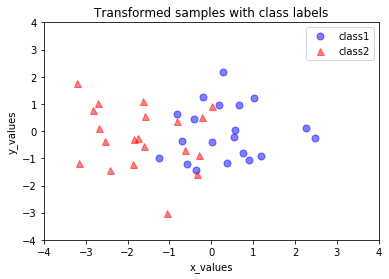

In [53]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [61]:
# 使用sklearn实现
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(all_samples.T)

In [62]:
transformed_pca

array([[ 0.24307905, -0.58889331],
       [ 0.67506431,  0.27535282],
       [ 0.07240167,  1.06712657],
       [ 1.18874471,  0.07989245],
       [ 3.1304638 ,  0.10519461],
       [ 1.31597298, -1.11070631],
       [ 0.94275704, -2.31343861],
       [ 1.56307658,  0.94607396],
       [ 1.41887043,  0.68591595],
       [ 1.21211014, -0.17534957],
       [-0.58958957,  0.84176307],
       [ 1.03846076,  1.04095085],
       [ 2.91709733, -0.23403824],
       [-0.04163791,  0.22709934],
       [ 1.84883412,  0.79353652],
       [ 0.46183561, -1.38722427],
       [ 1.68526456, -1.34847542],
       [ 0.84103367, -1.09506482],
       [ 0.29719419,  1.31608816],
       [-0.15458621, -0.75311412],
       [ 0.01563421,  0.56279948],
       [-2.16011136, -0.89774108],
       [-1.8879584 ,  0.24768112],
       [-2.05205874, -1.17377879],
       [-0.39970315,  2.87277429],
       [-0.96319959,  0.42075431],
       [ 0.66900439, -1.05455457],
       [-1.7609093 ,  1.30744838],
       [-0.98061143,

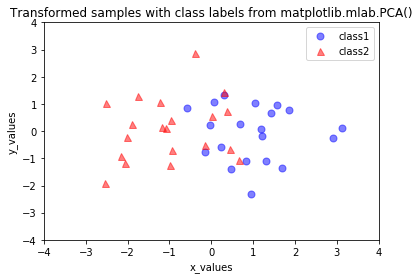

In [63]:
plt.plot(transformed_pca[0:20,0],transformed_pca[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed_pca[20:40,0], transformed_pca[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

## 压缩图片

In [119]:
srcImg = plt.imread('./lena.jpg').mean(axis=2)

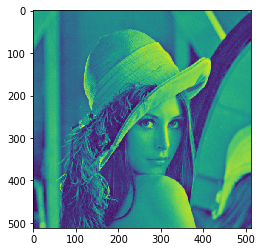

In [120]:
plt.imshow(srcImg)

In [197]:
# 使用pca进行压缩
# 奇异值分解
from sklearn.utils.extmath import randomized_svd

In [201]:
U, sigma, VT = randomized_svd(srcImg, n_components=20)

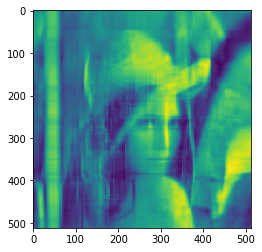

In [204]:
for i in range(20):
    new_src += sigma[i] * U[:, i].reshape(-1, 1).dot(VT[i].reshape(1, -1))
    plt.imshow(new_src)

In [186]:
U.shape, VT.shape

((512, 15), (15, 512))

In [ ]:
# 同样，还可以去除噪声